In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Plotly for some fancy visulization, reference from kaggle notebook and plotly library
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv
/kaggle/input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


# Read Data

In [2]:
df_data=pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
df_m_data=pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv')

In [3]:
display(df_data.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [4]:
display(df_m_data.head())

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649


In [5]:
print(df_data.shape)
print(df_m_data.shape)

(17607, 15)
(3808, 4)


In [6]:
print(df_data.nunique())
print(df_data.dtypes)
df_data.country.unique()

country                                  211
iso_code                                 211
date                                     163
total_vaccinations                      9867
people_vaccinated                       9128
people_fully_vaccinated                 6736
daily_vaccinations_raw                  7558
daily_vaccinations                     10682
total_vaccinations_per_hundred          4005
people_vaccinated_per_hundred           3307
people_fully_vaccinated_per_hundred     1888
daily_vaccinations_per_million          6424
vaccines                                  41
source_name                              104
source_website                           175
dtype: int64
country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw        

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia', '

In [7]:
print(df_m_data.nunique())
print(df_m_data.dtypes)
df_m_data.location.unique()

location                10
date                   141
vaccine                  5
total_vaccinations    3181
dtype: int64
location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object


array(['Chile', 'Czechia', 'France', 'Germany', 'Iceland', 'Italy',
       'Latvia', 'Lithuania', 'Romania', 'United States'], dtype=object)

# Overview

We could draw a treemap to see the vaccination progress:

**[Reference note of the treemap](https://plotly.com/python/treemaps/)**

In [8]:
# Draw the treemap to see the vaccine schemes (Package: plotly)
country_total = df_data.groupby(["country", "vaccines"])['total_vaccinations', 'total_vaccinations_per_hundred'].max().reset_index()

fig = px.treemap(country_total, path = ['vaccines', 'country'], values = 'total_vaccinations',
                title="Total Vaccinations Tree Map")
fig.show()

[Reference of the worldmap](https://plotly.com/python/reference/scattergeo/#scattergeo-locationmode)

In [9]:
# Worldmap
trace = go.Choropleth(
            locations = country_total['country'],
            locationmode='country names',
            z = country_total['total_vaccinations'],
            text = country_total['country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total vaccinations',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total vaccinations per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [10]:
trace = go.Choropleth(
            locations = country_total['country'],
            locationmode='country names',
            z = country_total['total_vaccinations_per_hundred'],
            text = country_total['country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total vaccinations per hundred people',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total vaccinations per hundred people per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

# Vaccination Progress by Country

In this section, we will look at the covid-19 and vaccination situation by country. Specifically, we choose US, UK and HK for analysis.Here, India is not chosen because the covid situation there is out of control, not comparable with other countries we choose. Moreover, Hong Kong instead of China is chosen because China almost has no new local cases now. Below are the data we get, which will be used for visualization later.

* **Data Preprocess**

In [11]:
US_data=df_data.loc[df_data['country'] == 'United States']
HK_data=df_data.loc[df_data['country'] == 'Hong Kong']
UK_data=df_data.loc[df_data['country'] == 'United Kingdom']
US_m_data=df_m_data.loc[df_m_data['location'] == 'United States']

In [12]:
display(US_data.head())
display(US_m_data.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
16929,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
16930,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
16931,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
16932,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
16933,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


,location,date,vaccine,total_vaccinations
3507,United States,2021-01-12,Moderna,3835859
3508,United States,2021-01-12,Pfizer/BioNTech,5488697
3509,United States,2021-01-13,Moderna,4249795
3510,United States,2021-01-13,Pfizer/BioNTech,6025872
3511,United States,2021-01-15,Moderna,5122662


In [13]:
display(UK_data.head())
display(HK_data.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
16799,United Kingdom,GBR,2021-01-03,1402432.0,1380430.0,22002.0,NaN,NaN,2.07,2.03,0.03,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
16800,United Kingdom,GBR,2021-01-04,NaN,NaN,NaN,NaN,182220.0,NaN,NaN,NaN,2684.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
16801,United Kingdom,GBR,2021-01-05,NaN,NaN,NaN,NaN,182220.0,NaN,NaN,NaN,2684.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
16802,United Kingdom,GBR,2021-01-06,NaN,NaN,NaN,NaN,182220.0,NaN,NaN,NaN,2684.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
16803,United Kingdom,GBR,2021-01-07,NaN,NaN,NaN,NaN,182220.0,NaN,NaN,NaN,2684.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6879,Hong Kong,HKG,2021-02-22,46.0,46.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Pfizer/BioNTech, Sinovac",Government of Hong Kong,https://www.covidvaccine.gov.hk/en/dashboard
6880,Hong Kong,HKG,2021-02-23,578.0,578.0,NaN,532.0,532.0,0.01,0.01,NaN,71.0,"Pfizer/BioNTech, Sinovac",Government of Hong Kong,https://www.covidvaccine.gov.hk/en/dashboard
6881,Hong Kong,HKG,2021-02-24,578.0,578.0,NaN,0.0,266.0,0.01,0.01,NaN,35.0,"Pfizer/BioNTech, Sinovac",Government of Hong Kong,https://www.covidvaccine.gov.hk/en/dashboard
6882,Hong Kong,HKG,2021-02-25,578.0,578.0,NaN,0.0,177.0,0.01,0.01,NaN,24.0,"Pfizer/BioNTech, Sinovac",Government of Hong Kong,https://www.covidvaccine.gov.hk/en/dashboard
6883,Hong Kong,HKG,2021-02-26,6644.0,6644.0,NaN,6066.0,1650.0,0.09,0.09,NaN,220.0,"Pfizer/BioNTech, Sinovac",Government of Hong Kong,https://www.covidvaccine.gov.hk/en/dashboard


* **Types of vaccines**

As can be seen from this dataset, vaccines in USA are produced by Johnson&Johnson, Moderna and Pfizer/BioNTech; Vaccines in UK are produced by Moderna, Oxford/AstraZeneca and Pfizer/BioNTech; Vaccines in HK are produced by Pfizer/BioNTech and Sinovac. We will see later how vaccines affect the situation of Covid-19. And for the US, we have additional data to analyse the daily vaccination of different vaccines.

In [14]:
print(US_m_data.nunique())
US_m_data.vaccine.unique()

location                1
date                  117
vaccine                 3
total_vaccinations    301
dtype: int64


array(['Moderna', 'Pfizer/BioNTech', 'Johnson&Johnson'], dtype=object)

In [15]:
print(US_data.vaccines.unique())
print(UK_data.vaccines.unique())
print(HK_data.vaccines.unique())

['Johnson&Johnson, Moderna, Pfizer/BioNTech']
['Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']
['Pfizer/BioNTech, Sinovac']


# Vaccination Progress in US by different manufacturers


In [16]:
us_vaccine_time = US_m_data[["location", "vaccine", "date", 'total_vaccinations']].dropna()
us_vaccine_time.columns = ["location", "vaccine", "Date", 'Total vaccinations']
vaccines = ['Moderna', 'Pfizer/BioNTech', 'Johnson&Johnson']
def plot_vaccine_time(data_df, feature, title, vaccines):
    data = []
    for vaccine in vaccines:
        df = data_df.loc[data_df.vaccine==vaccine]
        trace = go.Scatter(
            x = df['Date'],y = df[feature],
            name = vaccine,
            mode = "lines",
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=df['vaccine'])
        data.append(trace)
    layout = dict(title = title,
          xaxis = dict(title = 'Date', showticklabels=True,zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=2, linecolor='black', mirror=True,
                       tickfont=dict(size=10,color='black'),), 
          yaxis = dict(title = feature, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=2, linecolor='black', mirror=True, type="linear"),
                       plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
         hovermode = 'x', 
         height=400
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='US_vaccine')
    
plot_vaccine_time(us_vaccine_time, 'Total vaccinations', 'Total vaccinations', vaccines)

# Vaccination Progress by date

In [17]:
country_vaccine_time = df_data[["country", "vaccines", "date", 'total_vaccinations', 
                                'total_vaccinations_per_hundred',  'people_vaccinated','people_vaccinated_per_hundred',
                               'daily_vaccinations','daily_vaccinations_per_million', 
                                'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                               ]].dropna()
country_vaccine_time.columns = ["Country", "Vaccines", "Date", 'Total vaccinations', 'Percent', 'People vaccinated', 'People vaccinated percent',
                               "Daily vaccinations", "Daily vaccinations per million", 
                                'People fully vaccinated', 'People fully vaccinated percent']
countries = ['Hong Kong', 'United Kingdom', 'United States']
def plot_time_variation_countries_group(data_df, feature, title, countries):
    data = []
    for country in countries:
        df = data_df.loc[data_df.Country==country]
        trace = go.Scatter(
            x = df['Date'],y = df[feature],
            name=country,
            mode = "lines",
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=df['Country'])
        data.append(trace)
    layout = dict(title = title,
          xaxis = dict(title = 'Date', showticklabels=True,zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=2, linecolor='black', mirror=True,
                       tickfont=dict(size=10,color='black'),), 
          yaxis = dict(title = feature, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                       showline=True, linewidth=2, linecolor='black', mirror=True, type="linear"),
                       plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
         hovermode = 'x', 
         height=400
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='US_UK_HK')

In [18]:
plot_time_variation_countries_group(country_vaccine_time, 'Percent', 'Total vaccination percentage', countries)

In [19]:
plot_time_variation_countries_group(country_vaccine_time, 'People vaccinated percent', 'People vaccinated percentage', countries)

In [20]:
plot_time_variation_countries_group(country_vaccine_time, 'People fully vaccinated percent', 'People fully vaccinated percentage', countries)

The total vaccination percentages in UK and US are almost the same, while in UK more percent of people are vaccinated. This indicated that in US, more percent of people will be fully vaccinated, as shown in the third graph.

# Linear Regression for People Vaccined

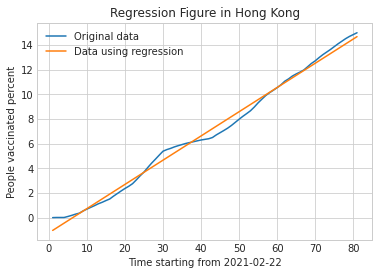

Hong Kong : slope = 0.19627439024390242 , intercept = -1.234163580246915


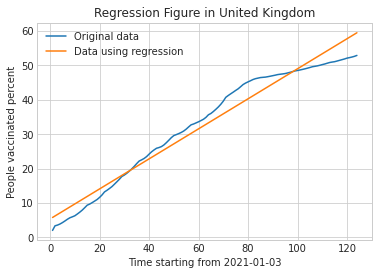

United Kingdom : slope = 0.43646605822187257 , intercept = 5.3572423288748965


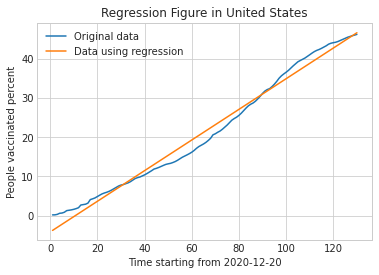

United States : slope = 0.3909988119460871 , intercept = -4.1834991055456285


In [21]:
from scipy import stats
plt.style.use('seaborn-whitegrid')

regression = df_data[["country", "date", 'people_vaccinated_per_hundred']].dropna()
countries = ['Hong Kong', 'United Kingdom', 'United States']

for country in countries: 
    df = regression.loc[regression.country==country]
    y = df['people_vaccinated_per_hundred'].values
    x_date = df['date'].values
    x = range(1, len(y)+1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.plot(x,y,label="Original data")
    plt.plot(x,slope*x+intercept,label="Data using regression")
    plt.xlabel("Time starting from "+x_date[0])
    plt.ylabel("People vaccinated percent")
    plt.title("Regression Figure in "+country)
    plt.legend()
    plt.show()
    print(country,": slope =", slope, ", intercept =", intercept)
    
    
    


# SIR Model to Predict Future Tendency

**We now define the SIR model with vaccination factor using Pytorch:**
* I: Infected; 
* R: Removed; 
* S: Susceptible; 
* Beta: Infection rate per infected person; 
* Gamma: Recover rate of the infected; 
* k: vaccine effect factor;

**Model:**
* N = S + I + R
* S(t+1) = S(t) - S(t) * beta * I(t)- k * N
* I(t+1) = I(t) + S(t) * beta * I(t) - gamma * I(t)
* R(t+1) = R(t) + gamma * I(t) + k * N

**Revise:**
* Beta = infection ability (# of cases per infected person)

In [22]:
country_covid = ['China Hong Kong Sar', 'USA', 'UK']
import torch
torch.set_default_tensor_type(torch.DoubleTensor)

class Dataset(torch.utils.data.Dataset):
    def __init__(self, country_data, is_full_dataset=False):
        if is_full_dataset:
            self.data = torch.tensor(country_data, requires_grad=True)
        else:
            self.data = torch.tensor(country_data, requires_grad=True)
            self.data = self.data[:20]
            print(self.data)
    def __len__(self):
        return len(self.data)-1
    def __getitem__(self,index):
        return self.data[index],self.data[index+1]

In [23]:
# Define SIR Model with vaccination
def SIR_V(St,It,Rt,beta,gamma,k):
    N = St + It + Rt
    S_t1 = St - St * beta * It - k * N
    I_t1 = It + St * beta * It - gamma * It
    R_t1 = Rt + gamma * It + k * N
    return S_t1, I_t1, R_t1

In [24]:
class Feedforward(torch.nn.Module):
    def __init__(self, is_debug = True):
        super(Feedforward, self).__init__()
        self.is_debug = is_debug
        # Initial Value：This is important
        self.beta = torch.nn.Parameter(torch.tensor(0.002))
        self.beta.requires_grad = True
        self.gamma = torch.nn.Parameter(torch.tensor(0.001))
        self.gamma.requires_grad = True
        # Based on the slope of the curve in last section
        self.k = torch.nn.Parameter(torch.tensor(0.0001))
        self.k.requires_grad = True
    def forward(self,data):
        St,It,Rt = data
        N = St + It + Rt
        S_t1 = St - self.beta * It - self.k * N
        I_t1 = It + self.beta * It - self.gamma * It
        R_t1 = Rt + self.gamma * It + self.k * N
        if self.is_debug:
            print(self.beta,self.gamma,self.k)
        return S_t1, I_t1, R_t1

model = Feedforward(is_debug=False)
# This is discarded later and replaced by handwritten loss function
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.00001)

* Train parameters using USA data.

date                       452
country                      1
cumulative_total_cases     444
daily_new_cases            442
active_cases               446
cumulative_total_deaths    438
daily_new_deaths           400
dtype: int64
tensor([[3.0040e+08, 7.9905e+06, 2.0842e+07],
        [3.0034e+08, 7.9025e+06, 2.0988e+07],
        [3.0026e+08, 7.8497e+06, 2.1115e+07],
        [3.0019e+08, 7.7984e+06, 2.1242e+07],
        [3.0011e+08, 7.7568e+06, 2.1361e+07],
        [3.0003e+08, 7.7356e+06, 2.1464e+07],
        [2.9996e+08, 7.6897e+06, 2.1575e+07],
        [2.9991e+08, 7.6709e+06, 2.1649e+07],
        [2.9985e+08, 7.6059e+06, 2.1768e+07],
        [2.9980e+08, 7.5613e+06, 2.1871e+07],
        [2.9973e+08, 7.5106e+06, 2.1989e+07],
        [2.9966e+08, 7.4780e+06, 2.2090e+07],
        [2.9959e+08, 7.4543e+06, 2.2183e+07],
        [2.9953e+08, 7.4130e+06, 2.2284e+07],
        [2.9948e+08, 7.3859e+06, 2.2357e+07],
        [2.9944e+08, 7.3185e+06, 2.2470e+07],
        [2.9938e+08, 7.2742e+06, 2

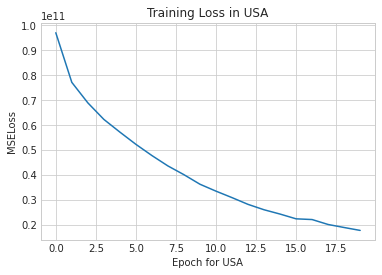

In [25]:
# Get US data
covid = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv')
country_data_US = covid.loc[covid['country'] == 'USA']
print(country_data_US.nunique())

country_data_US['Susceptible'] = 329227746-country_data_US['cumulative_total_cases']
country_data_US['Infected'] = country_data_US['active_cases'] 
country_data_US['Recovered'] = country_data_US['cumulative_total_cases'] - country_data_US['active_cases'] 
country_data_US = country_data_US[['Susceptible','Infected','Recovered']]
# Starting from Jan13 2021 (when we have vaccination data for USA)
# country_data_US = country_data_US.tail(119)
# Use Recent Data when vaccination is more stable
country_data_US = country_data_US.tail(80)
country_data_US = country_data_US.values

# Initialize a dataset
US_Covid_dataset = Dataset(country_data_US)
US_dataloader = torch.utils.data.DataLoader(US_Covid_dataset, batch_size=1, shuffle=True, num_workers=0)

loss_log = []
for epoch in range(20):
    train_loss = 0
    for i, data in enumerate(US_dataloader):
        optimizer.zero_grad()
        x_train = data[0][0]
        y_train = data[1][0]
        # x_train = torch.squeeze(x_train)
        # y_train = torch.squeeze(y_train)
        # Forward pass
        s, i, r = model(x_train)
        # Compute Loss
        loss = (y_train[0]-s).pow(2) + (y_train[1] - i).pow(2) + (y_train[2] - r).pow(2)
        train_loss += loss.item()
        # Backward pass
        loss.backward()
        # print(loss.grad)
        # print(y_pred.grad)
        optimizer.step()
    loss_log.append(train_loss)
    #print('Epoch {}: train loss: {}'.format(epoch, train_loss))

torch.save(model.state_dict(),'./US_SIR_parameter.pth')

# Plot loss
def plot_loss(epoch,log, country):
    plt.plot(epoch, log)
    plt.xlabel("Epoch for "+ country)
    plt.ylabel("MSELoss")
    plt.title("Training Loss in "+country)
    plt.legend()
    plt.show()

plot_loss(range(20),loss_log, "USA")

* Train parameter using HK data.

date                       452
country                      1
cumulative_total_cases     418
daily_new_cases            105
active_cases               321
cumulative_total_deaths    130
daily_new_deaths             8
dtype: int64
tensor([[7.4960e+06, 2.6900e+02, 1.0778e+04],
        [7.4959e+06, 2.6200e+02, 1.0794e+04],
        [7.4959e+06, 2.6200e+02, 1.0805e+04],
        [7.4959e+06, 2.5100e+02, 1.0824e+04],
        [7.4959e+06, 2.6000e+02, 1.0831e+04],
        [7.4959e+06, 2.6200e+02, 1.0838e+04],
        [7.4959e+06, 2.5700e+02, 1.0864e+04],
        [7.4959e+06, 2.5100e+02, 1.0878e+04],
        [7.4958e+06, 2.5400e+02, 1.0897e+04],
        [7.4958e+06, 2.9700e+02, 1.0914e+04],
        [7.4957e+06, 3.1700e+02, 1.0941e+04],
        [7.4957e+06, 3.2400e+02, 1.0958e+04],
        [7.4957e+06, 3.4000e+02, 1.0972e+04],
        [7.4957e+06, 3.4100e+02, 1.0989e+04],
        [7.4957e+06, 3.2900e+02, 1.1012e+04],
        [7.4956e+06, 3.2400e+02, 1.1027e+04],
        [7.4956e+06, 3.2400e+02, 1

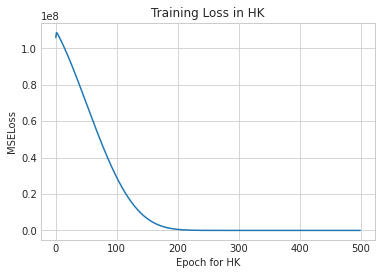

In [26]:
# Get HK data
covid = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv')
country_data_HK = covid.loc[covid['country'] == 'China Hong Kong Sar']
print(country_data_HK.nunique())

country_data_HK['Susceptible'] = 7507000-country_data_HK['cumulative_total_cases']
country_data_HK['Infected'] = country_data_HK['active_cases']
country_data_HK['Recovered'] = country_data_HK['cumulative_total_cases'] - country_data_HK['active_cases']
country_data_HK = country_data_HK[['Susceptible', 'Infected', 'Recovered']]
# Starting from Mar 2021 (when we have vaccination data for HK)
country_data_HK = country_data_HK.tail(70)
country_data_HK = country_data_HK.values

# Initialize a dataset
HK_Covid_dataset = Dataset(country_data_HK)
HK_dataloader = torch.utils.data.DataLoader(HK_Covid_dataset, batch_size=1, shuffle=True, num_workers=0)

loss_log = []
for epoch in range(500):
    train_loss = 0
    for i, data in enumerate(HK_dataloader):
        optimizer.zero_grad()
        x_train = data[0][0]
        y_train = data[1][0]
        # x_train = torch.squeeze(x_train)
        # y_train = torch.squeeze(y_train)
        # Forward pass
        s, i, r = model(x_train)
        # Compute Loss
        loss = (y_train[0]-s).pow(2) + (y_train[1] - i).pow(2) + (y_train[2] - r).pow(2)
        train_loss += loss.item()
        # Backward pass
        loss.backward()
        # print(loss.grad)
        # print(y_pred.grad)
        optimizer.step()
    #print('Epoch {}: train loss: {}'.format(epoch, train_loss))
    loss_log.append(train_loss)

torch.save(model.state_dict(),'./HK_SIR_parameter.pth')

plot_loss(range(500),loss_log, "HK")

* Train parameter using UK data

date                       452
country                      1
cumulative_total_cases     442
daily_new_cases            433
active_cases               442
cumulative_total_deaths    431
daily_new_deaths           279
dtype: int64
tensor([[62542033.,  1493001.,  2614966.],
        [62531412.,  1449041.,  2669547.],
        [62522939.,  1398587.,  2728474.],
        [62513019.,  1348597.,  2788384.],
        [62503052.,  1297241.,  2849707.],
        [62494545.,  1253699.,  2901756.],
        [62487125.,  1193790.,  2969085.],
        [62481101.,  1140561.,  3028338.],
        [62475656.,  1091335.,  3083009.],
        [62469277.,  1051535.,  3129188.],
        [62462904.,  1057593.,  3129503.],
        [62456344.,   973067.,  3220589.],
        [62450409.,   930763.,  3268828.],
        [62444380.,   881636.,  3323984.],
        [62439212.,   886722.,  3324066.],
        [62434509.,   812296.,  3403195.],
        [62428754.,   780515.,  3440731.],
        [62422839.,   753685.,  3473476

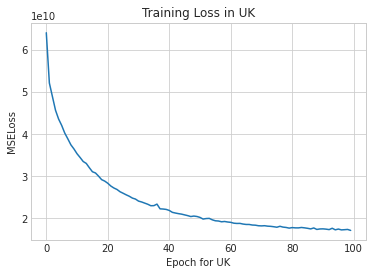

In [27]:
# Get UK data
covid = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv')
country_data_UK = covid.loc[covid['country'] == 'UK']
print(country_data_UK.nunique())

country_data_UK['Susceptible'] = 66650000-country_data_UK['cumulative_total_cases']
country_data_UK['Infected'] = country_data_UK['active_cases']
country_data_UK['Recovered'] = country_data_UK['cumulative_total_cases'] - country_data_UK['active_cases']
country_data_UK = country_data_UK[['Susceptible','Infected','Recovered']]
# Starting from Jan 2021 (when we have vaccination data for UK)
# country_data_UK = country_data_UK.tail(122)
country_data_UK = country_data_UK.tail(80)
country_data_UK = country_data_UK.values

# Initialize a dataset
UK_Covid_dataset = Dataset(country_data_UK)
UK_dataloader = torch.utils.data.DataLoader(UK_Covid_dataset, batch_size=1, shuffle=True, num_workers=0)

loss_log = []
for epoch in range(100):
    train_loss = 0
    for i, data in enumerate(UK_dataloader):
        optimizer.zero_grad()
        x_train = data[0][0]
        y_train = data[1][0]
        # x_train = torch.squeeze(x_train)
        # y_train = torch.squeeze(y_train)
        # Forward pass
        s, i, r = model(x_train)
        # Compute Loss
        loss = (y_train[0]-s).pow(2) + (y_train[1] - i).pow(2) + (y_train[2] - r).pow(2)
        train_loss += loss.item()
        # Backward pass
        loss.backward()
        # print(loss.grad)
        # print(y_pred.grad)
        optimizer.step()
    loss_log.append(train_loss)
    #print('Epoch {}: train loss: {}'.format(epoch, train_loss))

torch.save(model.state_dict(),'./UK_SIR_parameter.pth')
plot_loss(range(100),loss_log, "UK")

# Prediction using SIR parameters

* Define Plot Function

In [28]:
covid = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv')
def plot_prediction(country_data, country, t, type_of_people, location):
    df = covid.loc[covid['country'] == location]
    date = df['date'].tail(t)
    date = date.values
    day = date[0]
    x = range(1, len(country_data)+1)
    
    input_data = torch.tensor(country_data[0])
    model = Feedforward(is_debug=False)
    model.load_state_dict(torch.load('./'+country+'_SIR_parameter.pth'))
    model.eval()
    
    prediction = []
    s, i, r = input_data
    convert = [s.item(), i.item(), r.item()]
    prediction.append(convert)
    
    for i in range(len(country_data)-1):
        input_data = model(input_data)
        s, i, r = input_data
        convert = [s.item(), i.item(), r.item()]
        prediction.append(convert)
    
    prediction = np.array(prediction)
    
    
    if type_of_people == 'S':
        plt.plot(x, country_data[:,0], label='original susceptible data for '+country)
        plt.plot(x, prediction[:,0], label='predicted susceptible data for '+country)
    if type_of_people == 'I':
        plt.plot(x, country_data[:,1], label='original infected data for '+country)
        plt.plot(x, prediction[:,1], label='predicted susceptible data for '+country)
    if type_of_people == 'R':
        plt.plot(x, country_data[:,2], label='original recovered data for '+country)
        plt.plot(x, prediction[:,2], label='predicted susceptible data for '+country)

    plt.xlabel("Time starting from date "+day)
    plt.ylabel("Number of cases")
    plt.title("Prediction Comparison for "+country)
    plt.legend()
    plt.show()

* Prediction -- US

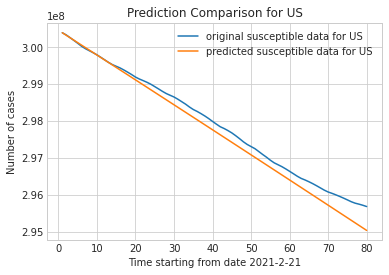

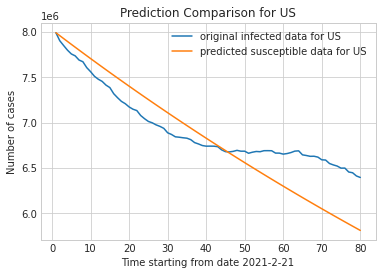

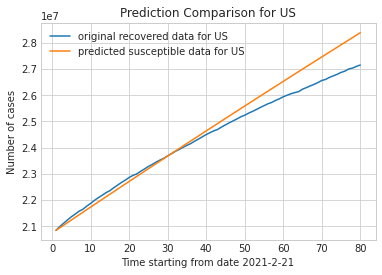

In [29]:
plot_prediction(country_data_US, 'US', 80, 'S', 'USA')
plot_prediction(country_data_US, 'US', 80, 'I', 'USA')
plot_prediction(country_data_US, 'US', 80, 'R', 'USA')

* Prediction -- UK

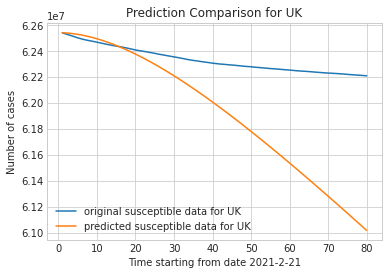

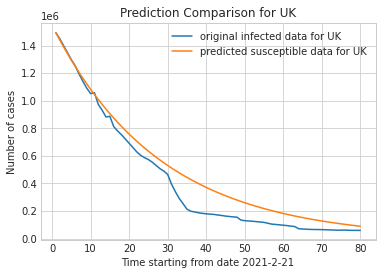

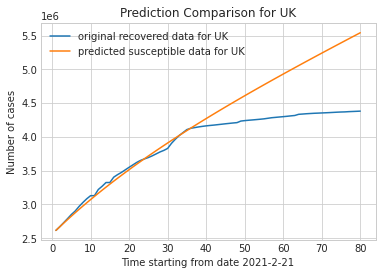

In [30]:
plot_prediction(country_data_UK, 'UK', 80, 'S', 'UK')
plot_prediction(country_data_UK, 'UK', 80, 'I', 'UK')
plot_prediction(country_data_UK, 'UK', 80, 'R', 'UK')

* Prediction -- HK

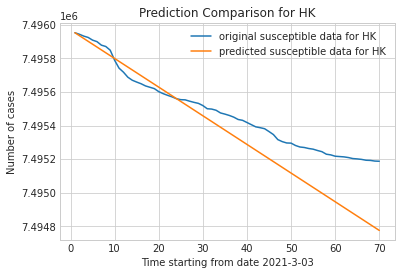

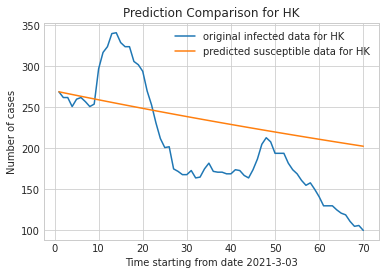

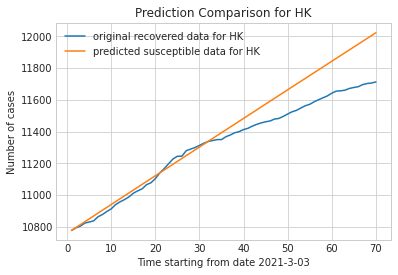

In [31]:
plot_prediction(country_data_HK, 'HK', 70, 'S', 'China Hong Kong Sar')
plot_prediction(country_data_HK, 'HK', 70, 'I', 'China Hong Kong Sar')
plot_prediction(country_data_HK, 'HK', 70, 'R', 'China Hong Kong Sar')

As the SIR model with vaccination ignores many other factors, the model is not completely precise, but gives a generate trend.